In [ ]:
abTEM requires an orthogonal atomic structure 

In [20]:
from ase.build import graphene
from abtem import show_atoms
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms

## Hexagonal structures

We will build our understanding of the problem by first solving the important special case of hexagonal structures. Here we create a minimal unit cell of graphene and show a corresponding repeated supercell.

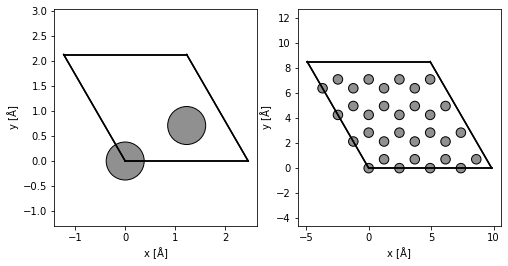

In [4]:
atoms = graphene()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
show_atoms(atoms, ax=ax1);
show_atoms(atoms * (4, 4, 1), ax=ax2);

To make the structure orthogonal we need to change the second lattice vector `b` such that it only has a component in the `y`-direction.

In [12]:
a, b, c = atoms.cell

print(f'a = {a}')
print(f'b = {b}')

a = [2.46 0.   0.  ]
b = [-1.23        2.13042249  0.        ]


First, let's see what happens if we naively make the cell orthgonal by setting the x-component of the second lattice vector to zero.

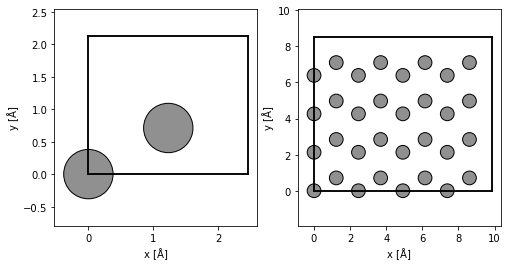

In [13]:
wrong_atoms = atoms.copy()
wrong_atoms.cell[1] = [0., b[1], 0.]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
show_atoms(wrong_atoms, ax=ax1);
show_atoms(wrong_atoms * (4, 4, 1), ax=ax2);

The result is a cell that is obviously orthogonal, however, when we repeat the cell, we see that it no longer tiles to produce the graphene structure.

To ensure periodicity we have to make a new lattice vector by combining the old ones:
$$
b' = n \cdot b + m \cdot a ,
$$
where `n` and `m` are integers, and to ensure orthogonality we want the `x`-component of `b'` to be zero:
$$
b_x' = 0
$$

Combning the conditions we get
$$
n = -m \frac{a_x}{b_x} ,
$$

This has infinitely many solutions, but we get the smallest cell by choosing $m = 1$ in which case $n = 2$. This works because for the hexagonal cell the ratio of the x-components are exactly `-2`.

In [14]:
print(f'bx / ax = {a[0] / b[0]}')

bx / ax = -2.0


This is implemented below. Note that we don't multiply the lattice vector by two we repeat the atoms object.

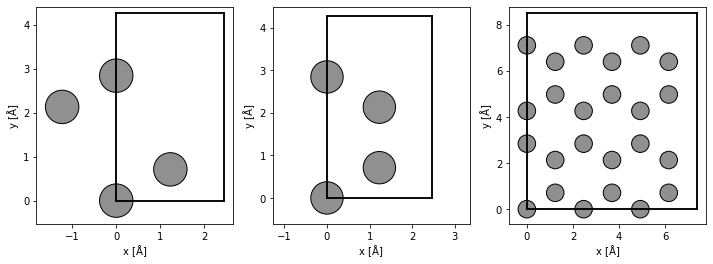

In [15]:
orthogonal_atoms = atoms * (1, 2, 1) # multiply the b lattice vector by 2 (and a lattice vector by 1)
orthogonal_atoms.cell[1] += a # add the a lattice vector

wrapped_orthogonal_atoms = orthogonal_atoms.copy()
wrapped_orthogonal_atoms.wrap() # "wrap" the atoms outside the cell back into the cell (not strictly necessary due to periodic boundaries)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
show_atoms(orthogonal_atoms, ax=ax1)
show_atoms(wrapped_orthogonal_atoms, ax=ax2)
show_atoms(wrapped_orthogonal_atoms * (3, 2, 1), ax=ax3);

The solution above works for any monoclic cell. However, we see that the value of `n` and hence the number of repetitions required in theory can be quite large entirely depending on the above ratio, i.e. if the ratio is $-5 / 3$ then $m = 3$ and $n=5$ is the smallest solution. The consequence is that the closer to orthogonal a structure is the more repetitions are required to make an equivalent orthogonal structure.

Moreover, if the ratio is irrational there are no solutions! 

This is not a problem in practice as we can find an approximate, which can be made good as we want. The solution is to apply a tiny bit of strain to unit cell, such that the ratio becomes the closest rational approximation. For example, if the ratio happens to be $pi$, we can apply strain such the the ratio is $22/7$
$$
n = m \pi \approx m \frac{22}{7}
$$
and we get the solution
$$
m = 7, n = 22
$$

<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>

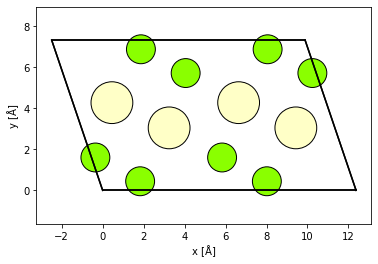

In [32]:
a = [12.371731149269, 0.000000000000, 0.000000000000]
b = [-2.487006312587, 7.329410702560, 0.000000000000]
c = [0.000000000000, 0.000000000000, 3.740697000000]

symbols = ['Ce'] * 4 + ['Mg'] * 8

scaled_positions = \
 [[0.845996463393, 0.416030792646, 0.000000000000],
  [0.345996463393, 0.416030792646, 0.500000000000],
  [0.154003536607, 0.583969207354, 0.000000000000],
  [0.654003536607, 0.583969207354, 0.500000000000],
  [0.160109395756, 0.060441354728, 0.000000000000],
  [0.660109395756, 0.060441354728, 0.500000000000],
  [0.515356394233, 0.218784113099, 0.000000000000],
  [0.015356394233, 0.218784113099, 0.500000000000],
  [0.484643605767, 0.781215886901, 0.000000000000],
  [0.984643605767, 0.781215886901, 0.500000000000],
  [0.839890604244, 0.939558645272, 0.000000000000],
  [0.339890604244, 0.939558645272, 0.500000000000]]
    
atoms = Atoms(symbols, scaled_positions=positions, cell=[a,b,c], pbc=True)

show_atoms(atoms * (1,1,1))

<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>

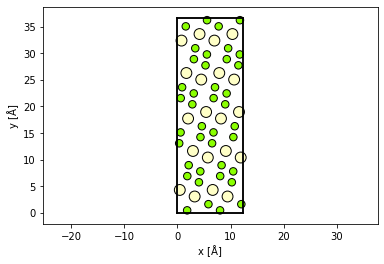

In [34]:
from abtem.structures import orthogonalize_cell

ortho, strain = orthogonalize_cell(atoms, return_strain=True)
ortho.wrap()

show_atoms(ortho)

In [35]:
strain

array([[-3.72944959e-07, -8.63649107e-04],
       [-8.63649107e-04,  1.11883516e-06]])

## Choosing a propagation direction

## 